In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt; plt.rc('font', size=16)
import pandas as pd
from pathlib import Path

In [2]:
pretty_names_dir = {'B_caccae': '$B. caccae$',
                'B_cellulosilyticus_WH2': '$B. cellulosilyticus$ WH2',
                'B_ovatus': '$B. ovatus$',
                'B_thetaiotaomicron': '$B. thetaiotaomicron$',
                'B_uniformis': '$B. uniformis$',
                'B_vulgatus': '$B. vulgatus$',
                'C_aerofaciens': '$C. aerofaciens$',
                'C_scindens': '$C. scindens$',
                'C_spiroforme': '$C. spiroforme$',
                'D_longicatena': '$D. longicatena$',
                'P_distasonis': '$P. distasonis$',
                'R_obeum': '$R. obeum$'}

order = ['B_cellulosilyticus_WH2', 
        'B_caccae', 
        'B_vulgatus', 
        'B_thetaiotaomicron', 
        'B_ovatus', 
        'R_obeum', 
        'B_uniformis', 
        'P_distasonis', 
        'C_scindens', 
        'C_aerofaciens', 
        'C_spiroforme', 
        'D_longicatena']

In [3]:
# Define the input directory
input_dir = Path(f'mcnulty-results/posteriors')
LF0 = pd.read_table(input_dir / 'nodes.tsv', index_col=0)

In [4]:
def plot_growth_and_perturbation(nodes, exp='LF0', pretty_names=True, ax=None, save_f=None):
    gp = nodes.loc[:, [ 'Perturbation_median', 'Growth_mean']].copy()
    gp.columns  = ['Perturbation effect', 'Growth rate']
    gp = gp.loc[order[::-1], :]
    if exp == 'HF0':
        gp['Perturbation effect'] = -gp['Perturbation effect']
    if pretty_names:
        gp.index = gp.index.map(pretty_names_dir)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    else:
        fig = ax.figure
    gp.plot.barh(rot=0, 
        width=1, 
        figsize=(10, 10), 
        color=['#ff7f0e', '#1f77b4'], 
        edgecolor='k', 
        linewidth=1, 
        xlim=(-1, 1), 
        ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('Parameter value')
    ax.set_ylabel('Species')
    if save_f is not None:
        fig.savefig(f'{save_f}', bbox_inches='tight')
    return fig, ax

def plot_self_interactions(nodes, pretty_names=True, ax=None, save_f=None):
    si = nodes.loc[:, ['Self_interaction_mean']].copy()
    si.columns  = ['Self-interaction']
    si = si.loc[order[::-1], :]
    if pretty_names:
        si.index = si.index.map(pretty_names_dir)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    else:
        fig = ax.figure
    si.plot.barh(rot=0, 
        width=1, 
        figsize=(10, 10), 
        color=['#1f77b4'], 
        edgecolor='k', 
        linewidth=1, 
        xlim=(1e-9, 1.5e-6), 
        legend=False,
        logx=True,
        ax=ax)
    ax.set_xlabel('$Log_{10}$ Self-interaction')
    ax.set_ylabel('Species')
    ax.set_title('Self-interaction coefficients')
    if save_f is not None:
        fig.savefig(f'{save_f}', bbox_inches='tight')
    return fig, ax

def plot_growth_and_perturbation_both(nodes_lf0, nodes_hf0, pretty_names=True, ax=None, save_f=None):
    gp_lf0 = nodes_lf0.loc[:, ['Perturbation_median', 'Growth_mean']].copy()
    gp_lf0.columns  = ['Perturbation effect LF0', 'Growth rate LF0']
    gp_lf0 = gp_lf0.loc[order[::-1], :]
    gp_hf0 = nodes_hf0.loc[:, ['Perturbation_median', 'Growth_mean']].copy()
    gp_hf0['Perturbation_median'] = -gp_hf0['Perturbation_median']
    gp_hf0.columns  = ['Perturbation effect HF0', 'Growth rate HF0']
    gp_hf0 = gp_hf0.loc[order[::-1], :]
    both = pd.concat([gp_lf0, gp_hf0], axis=1)
    # both = both.iloc[:, [0, 2, 1, 3]]
    if pretty_names:
        both.index = gp_lf0.index.map(pretty_names_dir)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    else:
        fig = ax.figure
    both.plot.barh(rot=0, 
        width=0.9, 
        figsize=(10, 10), 
        color=['#ffa53e', '#ff690e', '#8dd3ff', '#1f3cb4'],
        edgecolor='k', 
        linewidth=0.8, 
        xlim=(-1, 1), 
        ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('Parameter value')
    ax.set_ylabel('Species')
    if save_f is not None:
        fig.savefig(f'{save_f}', bbox_inches='tight')
    return fig, ax

def plot_self_interactions_both(nodes_lf0, nodes_hf0, pretty_names=True, ax=None, save_f=None):
    si_lf0 = nodes_lf0.loc[:, ['Self_interaction_mean']].copy()
    si_lf0.columns  = ['Self-interaction LF0']
    si_lf0 = si_lf0.loc[order[::-1], :]
    si_hf0 = nodes_hf0.loc[:, ['Self_interaction_mean']].copy()
    si_hf0.columns  = ['Self-interaction HF0']
    si_hf0 = si_hf0.loc[order[::-1], :]
    both = pd.concat([si_lf0, si_hf0], axis=1)
    if pretty_names:
        both.index = si_lf0.index.map(pretty_names_dir)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    else:
        fig = ax.figure
    both.plot.barh(rot=0, 
        width=0.9, 
        figsize=(10, 10), 
        color=['#ff690e', '#1f3cb4'],
        edgecolor='k', 
        linewidth=0.8, 
        xlim=(1e-9, 1.5e-6), 
        logx=True,
        ax=ax)
    ax.set_xlabel('$Log_{10}$ Self-interaction')
    ax.set_ylabel('Species')
    ax.set_title('Self-interaction coefficients')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if save_f is not None:
        fig.savefig(f'{save_f}', bbox_inches='tight')
    return fig, ax

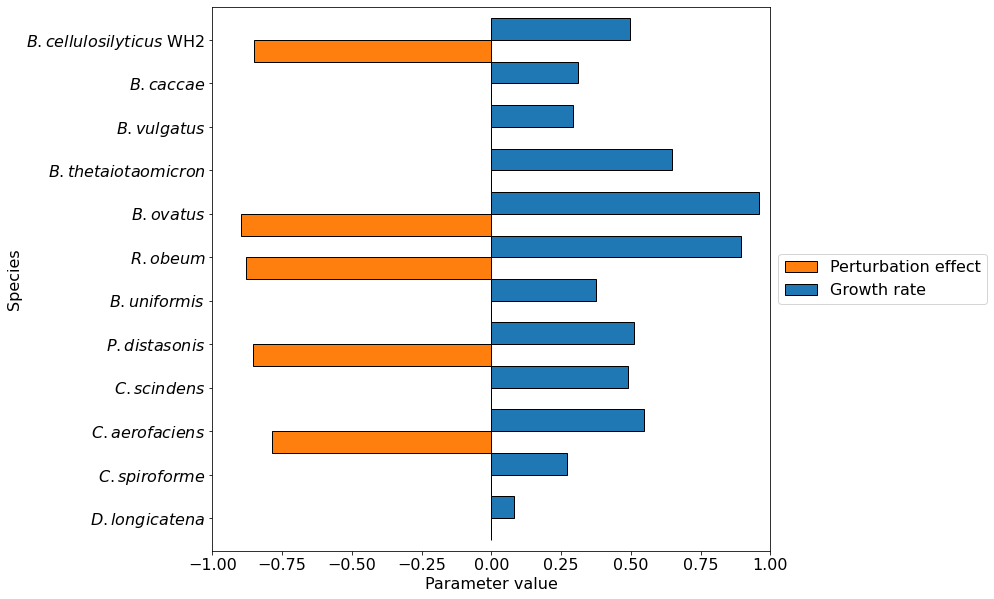

In [5]:
plot_growth_and_perturbation(LF0)
plt.show()

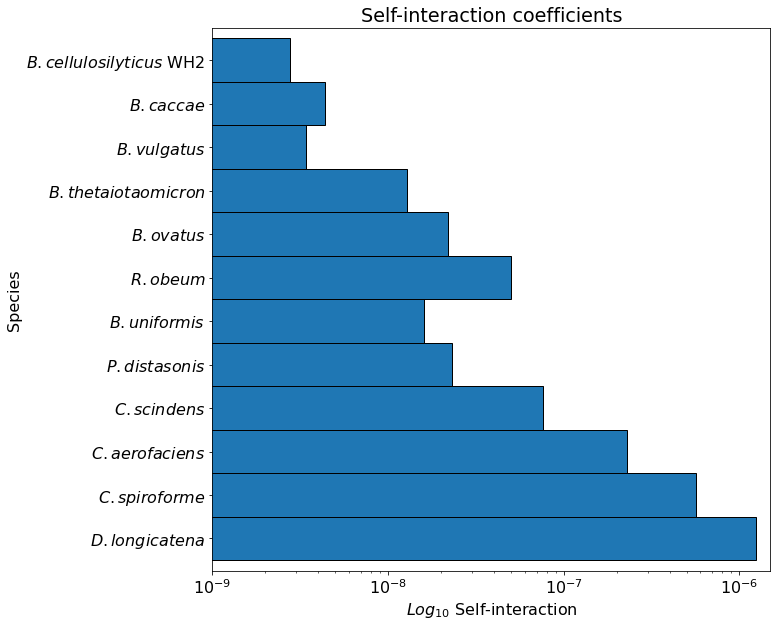

In [6]:
plot_self_interactions(LF0)
plt.show()

In [7]:
plot_growth_and_perturbation_both(nodes_lf0, nodes_hf0)

NameError: name 'nodes_lf0' is not defined

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Self-interaction coefficients'}, xlabel='$Log_{10}$ Self-interaction', ylabel='Species'>)

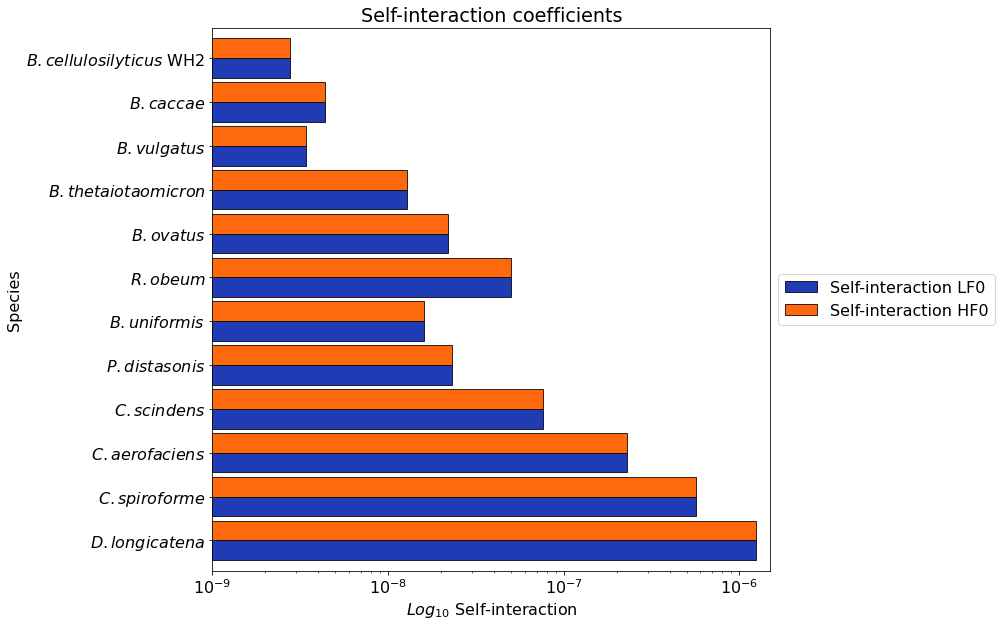

In [ ]:
plot_self_interactions_both(nodes_lf0, nodes_hf0)